Importing

In [1]:
# 📦 Step 0: Importing required libraries

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Models (for later)
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Warnings
import warnings
warnings.filterwarnings('ignore')


Load the dataset

In [2]:
# 📂 Step 1: Load the dataset

# Load the cleaned EHR dataset
df = pd.read_csv('cleaned_ehr_dataset_only_valid_rows.csv')

# Preview the shape and first few rows
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (500, 51)


,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,occupation,...,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV,treat_date,treat_treatment,treat_outcome,social_smoking,social_alcohol_consumption,social_exercise_habits,side_effects_text
0,P00001,Sophia Martinez,44.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Teacher,...,34.5,65.0,83.1,['2024-09-09'],['Chemotherapy'],['progressive disease'],Current smoker,Regular,Active,Infections
1,P00002,Sophia Martinez,20.0,Male,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,No,Retired,...,39.4,50.0,92.0,['2024-09-01'],['Radiation Therapy'],['under palliative care'],Never smoked,NaN,Active,"Fatigue, Infections"
2,P00003,James Wilson,53.0,Female,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,No,Doctor,...,41.2,63.2,80.5,['2024-09-02'],['Chemotherapy'],['stable disease'],Current smoker,NaN,Moderate,"Hair Loss, Nausea"
3,P00004,David Lee,41.0,Male,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,Yes,Teacher,...,48.3,45.9,90.8,['2024-09-14'],['Targeted Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Hair Loss, Nausea"
4,P00005,Emma Johnson,82.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Engineer,...,46.1,73.5,88.4,['2024-10-04'],['Radiation Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Fatigue, Infections"


Check the data types and non-null counts

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  500 non-null    object 
 1   name                        500 non-null    object 
 2   age                         500 non-null    float64
 3   gender                      500 non-null    object 
 4   diagnosis                   500 non-null    object 
 5   doctor_notes                500 non-null    object 
 6   ethnicity                   500 non-null    object 
 7   blood_type                  500 non-null    object 
 8   family_history_cancer       500 non-null    object 
 9   occupation                  500 non-null    object 
 10  previous_cancer             500 non-null    object 
 11  symptoms                    500 non-null    object 
 12  duration_of_symptoms        500 non-null    float64
 13  first_consultation          500 non

In [4]:
df.describe()

,age,duration_of_symptoms,blast_cells,time_to_relapse,cancer_year,lab_WBC,lab_RBC,lab_Hemoglobin,lab_Hematocrit,lab_Platelets,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV
count,500.000000,500.000000,500.000000,255.000000,246.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,52.486000,12.888000,25.312200,17.203922,2005.223577,11.503800,4.729800,13.020400,42.899800,302.698000,29.875000,60.032200,89.853800
std,18.124204,6.803236,14.398445,10.109128,8.724982,4.923141,0.741344,2.898563,7.094022,114.456504,11.251435,11.612367,5.874094
min,20.000000,1.000000,0.100000,1.000000,1990.000000,3.000000,3.500000,8.000000,30.000000,100.000000,10.100000,40.000000,80.100000
25%,37.000000,7.000000,13.100000,8.000000,1997.000000,7.175000,4.100000,10.400000,36.775000,203.750000,19.600000,49.775000,84.800000
50%,53.000000,13.000000,25.350000,17.000000,2006.000000,11.500000,4.700000,13.100000,43.500000,306.000000,30.350000,60.800000,89.850000
75%,68.000000,19.000000,37.800000,25.000000,2012.000000,15.700000,5.400000,15.525000,48.700000,407.250000,39.100000,69.950000,95.100000
max,84.000000,24.000000,50.000000,36.000000,2020.000000,19.900000,6.000000,18.000000,55.000000,500.000000,49.800000,79.800000,100.000000


In [5]:
df.head()

,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,occupation,...,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV,treat_date,treat_treatment,treat_outcome,social_smoking,social_alcohol_consumption,social_exercise_habits,side_effects_text
0,P00001,Sophia Martinez,44.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Teacher,...,34.5,65.0,83.1,['2024-09-09'],['Chemotherapy'],['progressive disease'],Current smoker,Regular,Active,Infections
1,P00002,Sophia Martinez,20.0,Male,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,No,Retired,...,39.4,50.0,92.0,['2024-09-01'],['Radiation Therapy'],['under palliative care'],Never smoked,NaN,Active,"Fatigue, Infections"
2,P00003,James Wilson,53.0,Female,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,No,Doctor,...,41.2,63.2,80.5,['2024-09-02'],['Chemotherapy'],['stable disease'],Current smoker,NaN,Moderate,"Hair Loss, Nausea"
3,P00004,David Lee,41.0,Male,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,Yes,Teacher,...,48.3,45.9,90.8,['2024-09-14'],['Targeted Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Hair Loss, Nausea"
4,P00005,Emma Johnson,82.0,Male,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,Yes,Engineer,...,46.1,73.5,88.4,['2024-10-04'],['Radiation Therapy'],['progressive disease'],Former smoker,Regular,Sedentary,"Fatigue, Infections"


In [6]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'ethnicity', 'blood_type', 'family_history_cancer', 'occupation',
       'previous_cancer', 'symptoms', 'duration_of_symptoms',
       'first_consultation', 'blast_cells', 'cell_morphology',
       'philadelphia_chromosome', 'FLT3_mutation', 'TP53_mutation',
       'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'response_to_treatment', 'relapse',
       'time_to_relapse', 'survival_status', 'last_follow_up', 'cancer_type',
       'cancer_year', 'med_name', 'med_dosage', 'med_frequency', 'lab_WBC',
       'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets',
       'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV', 'treat_date',
       'treat_treatment', 'treat_outcome', 'social_smoking',
       'social_alcohol_consumption', 'social_exercise_habits',
       'side_effects_text'],
      dtype='ob

Extraction of the Dark Data from doctor notes

In [ ]:
# 📦 Entity extraction setup
import scispacy
import en_ner_bc5cdr_md
import pandas as pd
from tqdm import tqdm

# Load SciSpacy biomedical model
nlp = en_ner_bc5cdr_md.load()

# Entity extraction function
def extract_entities(text):
    if pd.isnull(text) or str(text).strip() == "":
        return []
    doc = nlp(str(text).strip())
    return [ent.text.lower() for ent in doc.ents]

# Apply with progress bar
tqdm.pandas()

# Extract entities from relevant columns
df['doctor_notes_entities'] = df['doctor_notes'].progress_apply(extract_entities)
df['symptoms_entities'] = df['symptoms'].progress_apply(extract_entities)
df['side_effects_entities'] = df['side_effects_text'].progress_apply(extract_entities)


100%|██████████| 500/500 [00:02<00:00, 170.88it/s]


In [8]:
df['doctor_notes_entities'].head(), df['symptoms_entities'].head(), df['side_effects_entities'].head()

(0                               [lymphocytic leukemia]
 1       [myeloid leukemia, aml, myeloid leukemia, cml]
 2                [hodgkin's lymphoma, neoplasms (mpns]
 3                             [non-hodgkin's lymphoma]
 4    [lymphocytic leukemia, acute lymphoblastic leu...
 Name: doctor_notes_entities, dtype: object,
 0    [fatigue, fever']]
 1                [pain]
 2           [['fever']]
 3       [pain, fever']]
 4       [pain, fever']]
 Name: symptoms_entities, dtype: object,
 0                       []
 1    [fatigue, infections]
 2      [hair loss, nausea]
 3      [hair loss, nausea]
 4    [fatigue, infections]
 Name: side_effects_entities, dtype: object)

Categorical Columns -- Preprocessing

In [9]:
# Encode binary (Yes/No) columns

# Define columns to encode
binary_cols = [
    'family_history_cancer',
    'previous_cancer',
    'philadelphia_chromosome',
    'FLT3_mutation',
    'TP53_mutation',
    'chemotherapy',
    'radiation_therapy',
    'bone_marrow_transplant',
    'immunotherapy',
    'targeted_therapy',
    'relapse'
]

# Convert all 'Yes'/'No' to 1/0
df[binary_cols] = df[binary_cols].applymap(lambda x: 1 if str(x).strip().lower() == 'yes' else 0)


In [10]:
df[binary_cols].head()  # Check the first few rows of the encoded columns

,family_history_cancer,previous_cancer,philadelphia_chromosome,FLT3_mutation,TP53_mutation,chemotherapy,radiation_therapy,bone_marrow_transplant,immunotherapy,targeted_therapy,relapse
0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,1,0,1,1
2,0,1,1,1,1,0,0,0,0,0,1
3,1,1,0,1,0,0,1,0,0,1,1
4,1,0,0,0,0,1,1,0,1,1,1


In [11]:
le = LabelEncoder()
df['survival_status_encoded'] = le.fit_transform(df['survival_status'])

In [12]:
L_encoder = LabelEncoder()

# Fit and transform
df['gender'] = L_encoder.fit_transform(df['gender'])

In [13]:
df['gender'].value_counts()

gender
1    276
0    224
Name: count, dtype: int64

In [16]:

le = LabelEncoder()
df['cell_morphology_encoded'] = le.fit_transform(df['cell_morphology'])

In [17]:
df['occupation'].value_counts()

occupation
Salesperson    81
Manager        73
Doctor         69
Teacher        62
Engineer       58
Student        55
Nurse          53
Retired        49
Name: count, dtype: int64

One-Hot_Encoding

In [18]:
#One-hot encode 'occupation' with top N categories
# One-hot encode the cleaned column
df = pd.get_dummies(df, columns=['occupation'], prefix='occ')


In [19]:
df.head()  # Check the first few rows of the one-hot encoded DataFrame

,patient_id,name,age,gender,diagnosis,doctor_notes,ethnicity,blood_type,family_history_cancer,previous_cancer,...,survival_status_encoded,cell_morphology_encoded,occ_Doctor,occ_Engineer,occ_Manager,occ_Nurse,occ_Retired,occ_Salesperson,occ_Student,occ_Teacher
0,P00001,Sophia Martinez,44.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,1,0,...,1,0,False,False,False,False,False,False,False,True
1,P00002,Sophia Martinez,20.0,1,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",Asian,AB-,0,0,...,1,0,False,False,False,False,True,False,False,False
2,P00003,James Wilson,53.0,0,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",Other,AB-,0,1,...,0,0,True,False,False,False,False,False,False,False
3,P00004,David Lee,41.0,1,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,Other,AB-,1,1,...,1,1,False,False,False,False,False,False,False,True
4,P00005,Emma Johnson,82.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,Hispanic,A+,1,0,...,1,0,False,True,False,False,False,False,False,False


In [20]:
df[['ethnicity',
    'blood_type',
    'cancer_type',
    'response_to_treatment',
    'social_smoking',
    'social_alcohol_consumption',
    'social_exercise_habits']].isna().sum()

ethnicity                       0
blood_type                      0
cancer_type                   254
response_to_treatment           0
social_smoking                  0
social_alcohol_consumption    158
social_exercise_habits          0
dtype: int64

In [21]:
# Drop 'cancer_type' due to high missingness
df.drop(columns=['cancer_type'], inplace=True)

# Fill missing values in 'social_alcohol_consumption' with 'Unknown'
df['social_alcohol_consumption'] = df['social_alcohol_consumption'].fillna('Unknown')


In [22]:
# Step X: One-hot encode other nominal categorical columns
one_hot_cols = [
    'ethnicity',
    'blood_type',
    'response_to_treatment',
    'social_smoking',
    'social_alcohol_consumption',
    'social_exercise_habits'
]

# Perform one-hot encoding
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)# to avoid multicollinearity


In [23]:
df.columns  # Check the columns after one-hot encoding

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'family_history_cancer', 'previous_cancer', 'symptoms',
       'duration_of_symptoms', 'first_consultation', 'blast_cells',
       'cell_morphology', 'philadelphia_chromosome', 'FLT3_mutation',
       'TP53_mutation', 'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'relapse', 'time_to_relapse', 'survival_status',
       'last_follow_up', 'cancer_year', 'med_name', 'med_dosage',
       'med_frequency', 'lab_WBC', 'lab_RBC', 'lab_Hemoglobin',
       'lab_Hematocrit', 'lab_Platelets', 'lab_Lymphocyte %',
       'lab_Neutrophil %', 'lab_MCV', 'treat_date', 'treat_treatment',
       'treat_outcome', 'side_effects_text', 'doctor_notes_entities',
       'symptoms_entities', 'side_effects_entities', 'survival_status_encoded',
       'cell_morphology_encoded', 'occ_Doctor', 'occ_Engineer', 'occ_Manager',
       '

In [24]:
df.head()

,patient_id,name,age,gender,diagnosis,doctor_notes,family_history_cancer,previous_cancer,symptoms,duration_of_symptoms,...,blood_type_O+,blood_type_O-,response_to_treatment_No Response,response_to_treatment_Partial Remission,social_smoking_Former smoker,social_smoking_Never smoked,social_alcohol_consumption_Regular,social_alcohol_consumption_Unknown,social_exercise_habits_Moderate,social_exercise_habits_Sedentary
0,P00001,Sophia Martinez,44.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Multip...",Medical review indicates Chronic Lymphocytic L...,1,0,"['Weight Loss', 'Fatigue', 'Fever']",19.0,...,False,False,False,True,False,False,True,False,False,False
1,P00002,Sophia Martinez,20.0,1,"['Acute Myeloid Leukemia (AML)', 'Chronic Myel...","Diagnosis: Acute Myeloid Leukemia (AML), Chron...",0,0,['Bone Pain'],22.0,...,False,False,True,False,False,True,False,True,False,False
2,P00003,James Wilson,53.0,0,"[""Hodgkin's Lymphoma"", 'Myeloproliferative Neo...","Diagnosis: Hodgkin's Lymphoma, Myeloproliferat...",0,1,['Fever'],17.0,...,False,False,True,False,False,False,False,True,True,False
3,P00004,David Lee,41.0,1,"[""Non-Hodgkin's Lymphoma""]",The patient shows signs of Non-Hodgkin's Lymph...,1,1,"['Fatigue', 'Bone Pain', 'Fever']",8.0,...,False,False,False,False,True,False,True,False,False,True
4,P00005,Emma Johnson,82.0,1,"['Chronic Lymphocytic Leukemia (CLL)', 'Acute ...",Medical review indicates Chronic Lymphocytic L...,1,0,"['Bone Pain', 'Weight Loss', 'Fever']",24.0,...,False,False,False,True,True,False,True,False,False,True


In [25]:
len(df.columns)

75

In [26]:
df['time_to_relapse'].isna().sum()

245

In [27]:
df['cancer_year'].isna().sum()

254

In [28]:
df.drop(columns=['time_to_relapse'], inplace=True)

In [29]:
df.drop(columns=['cancer_year'], inplace=True)

Preprocess the Numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define numerical columns to scale
num_cols =[
    'age', 'duration_of_symptoms', 'blast_cells',
    'lab_WBC', 'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets',
    'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV'
    ]

# Fill missing values if any (you can also drop rows/columns if preferred)
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Initialize and apply scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [31]:
df[num_cols].head()  # Check for any remaining missing values

,age,duration_of_symptoms,blast_cells,lab_WBC,lab_RBC,lab_Hemoglobin,lab_Hematocrit,lab_Platelets,lab_Lymphocyte %,lab_Neutrophil %,lab_MCV
0,-0.468683,0.899296,0.277238,0.365214,-0.310288,0.994453,0.254017,0.920939,0.411470,0.428231,-1.150912
1,-1.794205,1.340704,-1.328709,0.649870,1.310015,1.098056,-0.691386,0.536129,0.847407,-0.864789,0.365733
2,0.028388,0.605024,0.325903,-1.627379,1.310015,1.616072,0.818437,-0.023596,1.007546,0.273069,-1.593977
3,-0.634373,-0.719201,0.743032,-0.041438,-0.580338,-1.146680,-0.903043,-0.154781,1.639209,-1.218214,0.161241
4,1.630061,1.634976,-0.369312,-0.346426,0.769914,0.890850,-1.777894,0.308740,1.443483,1.160942,-0.247741


In [32]:
import re

def extract_text(text):
    match = re.search(r"'(.*?)'", str(text))
    if match:
        return match.group(1)
    else:
        return None

# Columns that are list-like strings
list_columns = [
    'treat_date', 'treat_treatment', 'treat_outcome',
    'med_name', 'med_dosage', 'med_frequency'
]

# Apply to each
for col in list_columns:
    df[col] = df[col].apply(extract_text)


In [33]:
df[list_columns].head()

,treat_date,treat_treatment,treat_outcome,med_name,med_dosage,med_frequency
0,2024-09-09,Chemotherapy,progressive disease,Ibrutinib,420mg,Once/day
1,2024-09-01,Radiation Therapy,under palliative care,Daunorubicin,45mg,Once/day
2,2024-09-02,Chemotherapy,stable disease,Cytarabine,100mg,Once/day
3,2024-09-14,Targeted Therapy,progressive disease,Daunorubicin,45mg,Once/day
4,2024-10-04,Radiation Therapy,progressive disease,Cytarabine,100mg,Once/day


Handling Date Time

In [34]:
# Convert both columns safely
df['treat_date'] = pd.to_datetime(df['treat_date'], errors='coerce')
df['first_consultation'] = pd.to_datetime(df['first_consultation'], errors='coerce')

# Now calculate the difference
df['days_to_treatment'] = (df['treat_date'] - df['first_consultation']).dt.days


In [35]:
df['last_follow_up'] = pd.to_datetime(df['last_follow_up'], errors='coerce')
df['follow_up_duration'] = (df['last_follow_up'] - df['treat_date']).dt.days


Dark data Columns Extracted

In [36]:
dc=['doctor_notes_entities','symptoms_entities','side_effects_entities']
df[dc].head()

,doctor_notes_entities,symptoms_entities,side_effects_entities
0,[lymphocytic leukemia],"[fatigue, fever']]",[]
1,"[myeloid leukemia, aml, myeloid leukemia, cml]",[pain],"[fatigue, infections]"
2,"[hodgkin's lymphoma, neoplasms (mpns]",[['fever']],"[hair loss, nausea]"
3,[non-hodgkin's lymphoma],"[pain, fever']]","[hair loss, nausea]"
4,"[lymphocytic leukemia, acute lymphoblastic leu...","[pain, fever']]","[fatigue, infections]"


In [37]:
df_backup = df.copy()

In [38]:
len(df_backup.columns)

75

In [39]:
df=df_backup.copy()

In [40]:
# Convert all boolean columns to integers (True → 1, False → 0)
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)


In [41]:
selected_features = [
    'age',
    'gender',  # Encoded as 0/1
    'family_history_cancer',
    'previous_cancer',
    'philadelphia_chromosome',
    'FLT3_mutation',
    'TP53_mutation',
    'chemotherapy',
    'radiation_therapy',
    'bone_marrow_transplant',
    'immunotherapy',
    'targeted_therapy',
    'relapse',
    'cell_morphology_encoded',
    'survival_status_encoded',
    'lab_WBC', 'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit',
    'lab_Platelets', 'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV',
    'days_to_treatment', 'follow_up_duration'
]


In [42]:
one_hot_features = [col for col in df.columns if col.startswith(('ethnicity_', 'blood_type_', 'occ_', 'social_', 'response_to_treatment_'))]

In [43]:
features = selected_features + one_hot_features

In [44]:
len(features)

52

In [45]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'family_history_cancer', 'previous_cancer', 'symptoms',
       'duration_of_symptoms', 'first_consultation', 'blast_cells',
       'cell_morphology', 'philadelphia_chromosome', 'FLT3_mutation',
       'TP53_mutation', 'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'relapse', 'survival_status', 'last_follow_up',
       'med_name', 'med_dosage', 'med_frequency', 'lab_WBC', 'lab_RBC',
       'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets', 'lab_Lymphocyte %',
       'lab_Neutrophil %', 'lab_MCV', 'treat_date', 'treat_treatment',
       'treat_outcome', 'side_effects_text', 'doctor_notes_entities',
       'symptoms_entities', 'side_effects_entities', 'survival_status_encoded',
       'cell_morphology_encoded', 'occ_Doctor', 'occ_Engineer', 'occ_Manager',
       'occ_Nurse', 'occ_Retired', 'occ_Salespers

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['treat_outcome_encoded'] = le.fit_transform(df['treat_outcome'])

In [47]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['treat_outcome_encoded']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.53      0.78      0.63        23
           2       0.45      0.26      0.33        19
           3       0.38      0.33      0.35        18
           4       0.45      0.47      0.46        19

    accuracy                           0.47       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.47      0.45       100



In [49]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Classifier Performance:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Performance:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.91      0.89        23
           2       0.76      0.84      0.80        19
           3       0.68      0.83      0.75        18
           4       0.93      0.74      0.82        19

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print("Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        21
           1       0.68      0.74      0.71        23
           2       0.65      0.68      0.67        19
           3       0.62      0.72      0.67        18
           4       0.86      0.63      0.73        19

    accuracy                           0.68       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.68      0.68       100



In [51]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        21
           1       0.81      0.91      0.86        23
           2       0.62      0.68      0.65        19
           3       0.70      0.78      0.74        18
           4       0.73      0.58      0.65        19

    accuracy                           0.72       100
   macro avg       0.72      0.71      0.71       100
weighted avg       0.72      0.72      0.72       100



In [52]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)

print("LightGBM Performance:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [53]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb),
    ('lgbm', lgbm)
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print("Voting Classifier (Hard) Performance:")
print(classification_report(y_test, y_pred_vote))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [54]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking = StackingClassifier(
    estimators=[
        ('rf', rf),
        ('xgb', xgb),
        ('lgbm', lgbm)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking.fit(X_train, y_train)
y_pred_stack = stacking.predict(X_test)

print("Stacking Classifier Performance:")
print(classification_report(y_test, y_pred_stack))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1154
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 52
[LightGBM] [Info] Start training from score -1.548813
[LightGBM] [Info] Start training from score -1.448170
[LightGBM] [Info] Start training from score -1.647659
[LightGBM] [Info] Start training from score -1.757358
[LightGBM] [Info] Start training from score -1.673976
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [55]:
models = {
    'RandomForest': rf,
    'Bagging': bagging,
    'GradientBoosting': gb,
    'XGBoost': xgb,
    'LightGBM': lgbm,
    'Voting': voting_clf,
    'Stacking': stacking
}

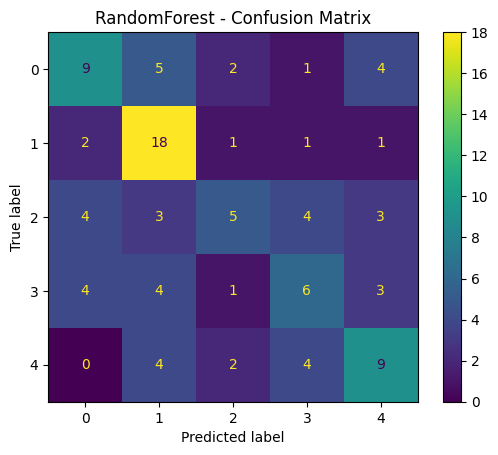

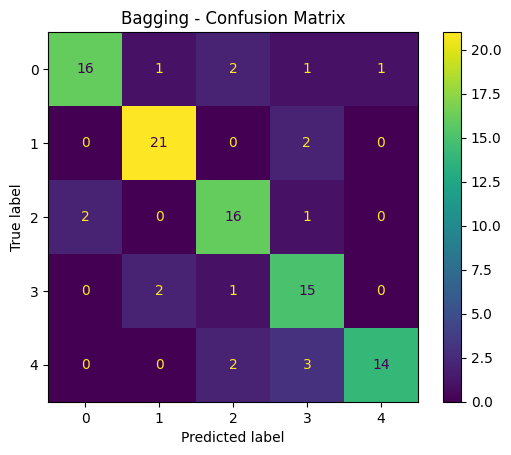

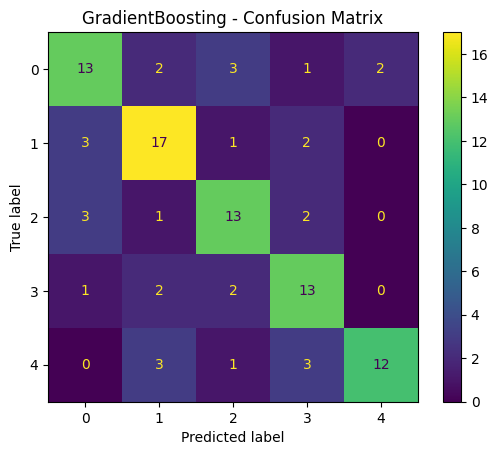

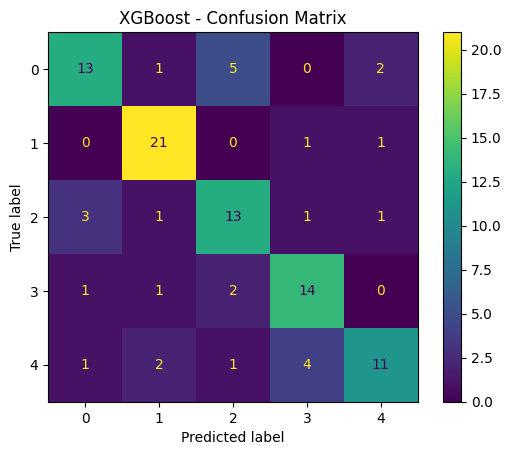

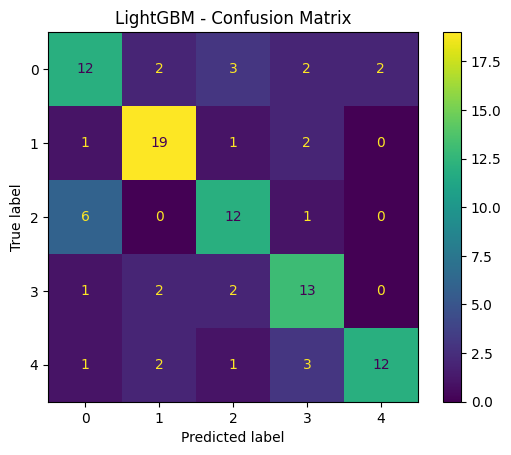

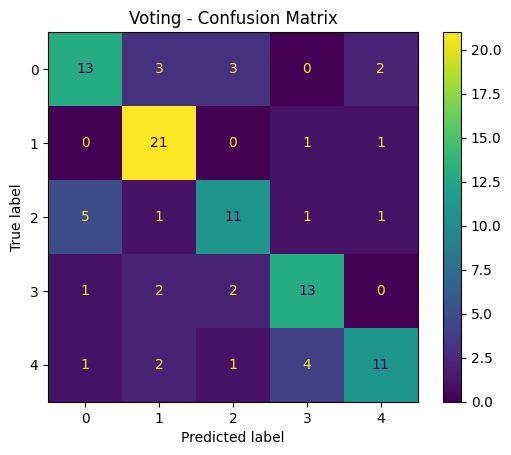

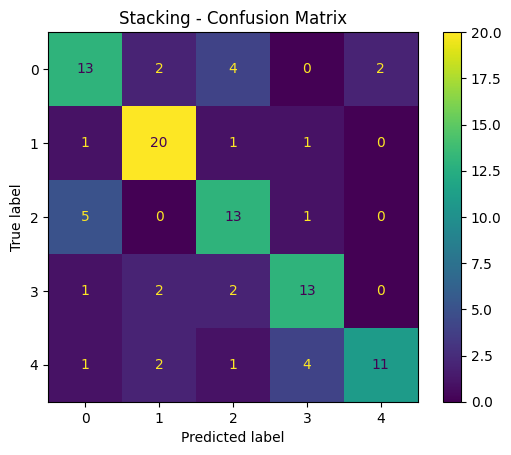

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_conf_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

for name, model in models.items():
    plot_conf_matrix(model, X_test, y_test, f"{name} - Confusion Matrix")


In [57]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("\n")


--- RandomForest ---
              precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.53      0.78      0.63        23
           2       0.45      0.26      0.33        19
           3       0.38      0.33      0.35        18
           4       0.45      0.47      0.46        19

    accuracy                           0.47       100
   macro avg       0.46      0.46      0.45       100
weighted avg       0.46      0.47      0.45       100



--- Bagging ---
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        21
           1       0.88      0.91      0.89        23
           2       0.76      0.84      0.80        19
           3       0.68      0.83      0.75        18
           4       0.93      0.74      0.82        19

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82     

In [61]:
df_backup=df.copy()

In [58]:
df.to_csv("om_output.csv", index=False)

In [95]:
df.columns

Index(['patient_id', 'name', 'age', 'gender', 'diagnosis', 'doctor_notes',
       'family_history_cancer', 'previous_cancer', 'symptoms',
       'duration_of_symptoms', 'first_consultation', 'blast_cells',
       'cell_morphology', 'philadelphia_chromosome', 'FLT3_mutation',
       'TP53_mutation', 'ct_mri_findings', 'flow_cytometry', 'chemotherapy',
       'radiation_therapy', 'bone_marrow_transplant', 'immunotherapy',
       'targeted_therapy', 'relapse', 'survival_status', 'last_follow_up',
       'med_name', 'med_dosage', 'med_frequency', 'lab_WBC', 'lab_RBC',
       'lab_Hemoglobin', 'lab_Hematocrit', 'lab_Platelets', 'lab_Lymphocyte %',
       'lab_Neutrophil %', 'lab_MCV', 'treat_date', 'treat_treatment',
       'treat_outcome', 'side_effects_text', 'doctor_notes_entities',
       'symptoms_entities', 'side_effects_entities', 'survival_status_encoded',
       'cell_morphology_encoded', 'occ_Doctor', 'occ_Engineer', 'occ_Manager',
       'occ_Nurse', 'occ_Retired', 'occ_Salespers

In [102]:
df_backup['doctor_notes_entities']

0                                 [lymphocytic leukemia]
1         [myeloid leukemia, aml, myeloid leukemia, cml]
2                  [hodgkin's lymphoma, neoplasms (mpns]
3                               [non-hodgkin's lymphoma]
4      [lymphocytic leukemia, acute lymphoblastic leu...
                             ...                        
495                       [chronic lymphocytic leukemia]
496    [acute myeloid leukemia, aml, non-hodgkin's ly...
497             [myeloid leukemia, cml, neoplasms (mpns]
498                                                   []
499                    [myelodysplastic syndromes (mds)]
Name: doctor_notes_entities, Length: 500, dtype: object

In [101]:
df=df_backup.copy()

In [103]:
df['doctor_notes_str'] = df['doctor_notes_entities'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
df['side_effects_str'] = df['side_effects_entities'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In [104]:
df['doctor_notes_str']


0                                   lymphocytic leukemia
1              myeloid leukemia aml myeloid leukemia cml
2                     hodgkin's lymphoma neoplasms (mpns
3                                 non-hodgkin's lymphoma
4      lymphocytic leukemia acute lymphoblastic leuke...
                             ...                        
495                         chronic lymphocytic leukemia
496    acute myeloid leukemia aml non-hodgkin's lymph...
497                 myeloid leukemia cml neoplasms (mpns
498                                                     
499                      myelodysplastic syndromes (mds)
Name: doctor_notes_str, Length: 500, dtype: object

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

# You can tune max_features based on performance
tfidf_doctor = TfidfVectorizer(max_features=50)
tfidf_side = TfidfVectorizer(max_features=20)

doctor_tfidf_matrix = tfidf_doctor.fit_transform(df['doctor_notes_str'])
side_tfidf_matrix = tfidf_side.fit_transform(df['side_effects_str'])

# Convert to DataFrames
df_doctor_tfidf = pd.DataFrame(doctor_tfidf_matrix.toarray(), columns=[f"tfidf_doctor_{f}" for f in tfidf_doctor.get_feature_names_out()])
df_side_tfidf = pd.DataFrame(side_tfidf_matrix.toarray(), columns=[f"tfidf_side_{f}" for f in tfidf_side.get_feature_names_out()])

# Set index to match original
df_doctor_tfidf.index = df.index
df_side_tfidf.index = df.index

In [107]:
# Make sure this is defined again
structured_features = [
    'age', 'gender', 'family_history_cancer', 'previous_cancer',
    'philadelphia_chromosome', 'FLT3_mutation', 'TP53_mutation',
    'chemotherapy', 'radiation_therapy', 'bone_marrow_transplant',
    'immunotherapy', 'targeted_therapy', 'relapse',
    'cell_morphology_encoded', 'survival_status_encoded',
    'lab_WBC', 'lab_RBC', 'lab_Hemoglobin', 'lab_Hematocrit',
    'lab_Platelets', 'lab_Lymphocyte %', 'lab_Neutrophil %', 'lab_MCV',
    'days_to_treatment', 'follow_up_duration'
]

# Include one-hot features
one_hot_groups = [col for col in df.columns if col.startswith(
    ('occ_', 'ethnicity_', 'blood_type_', 'response_to_treatment_', 'social_')
)]
structured_features += one_hot_groups

# Final structured DataFrame
X_structured_only = df[structured_features].copy()
y = df['treat_outcome_encoded']


In [108]:
X_with_tfidf = pd.concat([
    X_structured_only.copy(),
    df_doctor_tfidf,
    df_side_tfidf
], axis=1)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_with_tfidf, y, test_size=0.2, stratify=y, random_state=42
)


In [110]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Define models
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42, min_gain_to_split=0.01, min_data_in_leaf=10, verbose=-1),
    'Bagging': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'Voting': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
        ('lgbm', LGBMClassifier(random_state=42))
    ], voting='hard'),
    'Stacking': StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
            ('lgbm', LGBMClassifier(random_state=42))
        ],
        final_estimator=LogisticRegression(), cv=5
    )
}

In [111]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    
    results.append([name, acc, f1])

results_tfidf = pd.DataFrame(results, columns=["Model", "Accuracy", "F1 Score"])



RandomForest Performance:
              precision    recall  f1-score   support

           0       0.60      0.57      0.59        21
           1       0.77      1.00      0.87        23
           2       0.65      0.68      0.67        19
           3       0.93      0.72      0.81        18
           4       0.81      0.68      0.74        19

    accuracy                           0.74       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.75      0.74      0.74       100


GradientBoosting Performance:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.88      0.91      0.89        23
           2       0.82      0.74      0.78        19
           3       0.80      0.89      0.84        18
           4       0.72      0.68      0.70        19

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       

In [112]:
import matplotlib.pyplot as plt

def plot_comparison(df1, df2, label1="Structured Only", label2="With TF-IDF Dark Data"):
    df1 = df1.copy()
    df2 = df2.copy()
    
    df1['Type'] = label1
    df2['Type'] = label2

    combined = pd.concat([df1, df2])

    for metric in ['Accuracy', 'F1 Score']:
        plt.figure(figsize=(10, 5))
        pivot = combined.pivot(index='Model', columns='Type', values=metric)
        pivot.plot(kind='bar', figsize=(12, 6))
        plt.title(f'Model Comparison: {metric}')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()


<Figure size 1000x500 with 0 Axes>

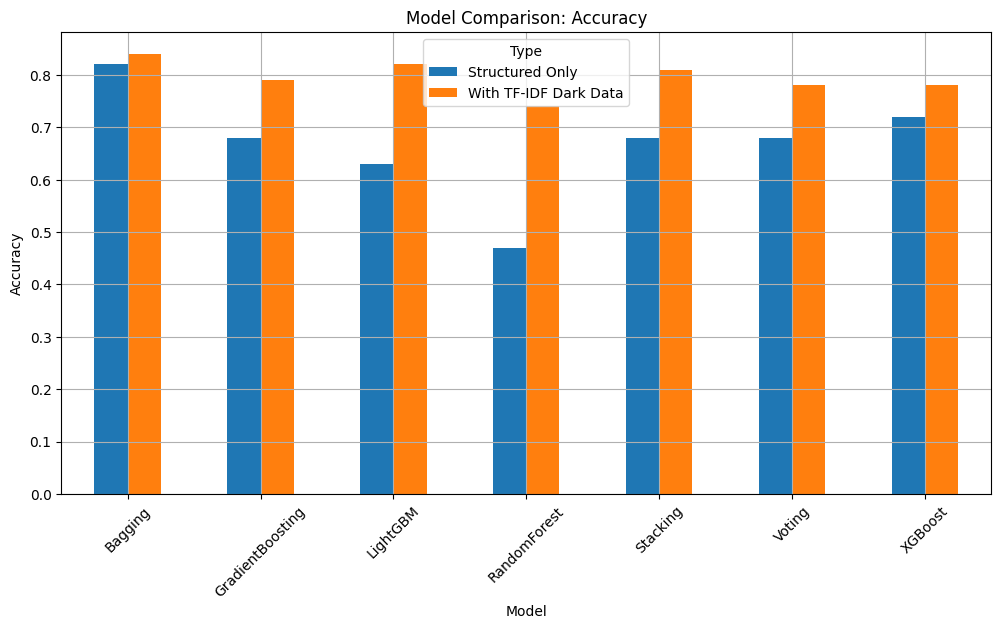

<Figure size 1000x500 with 0 Axes>

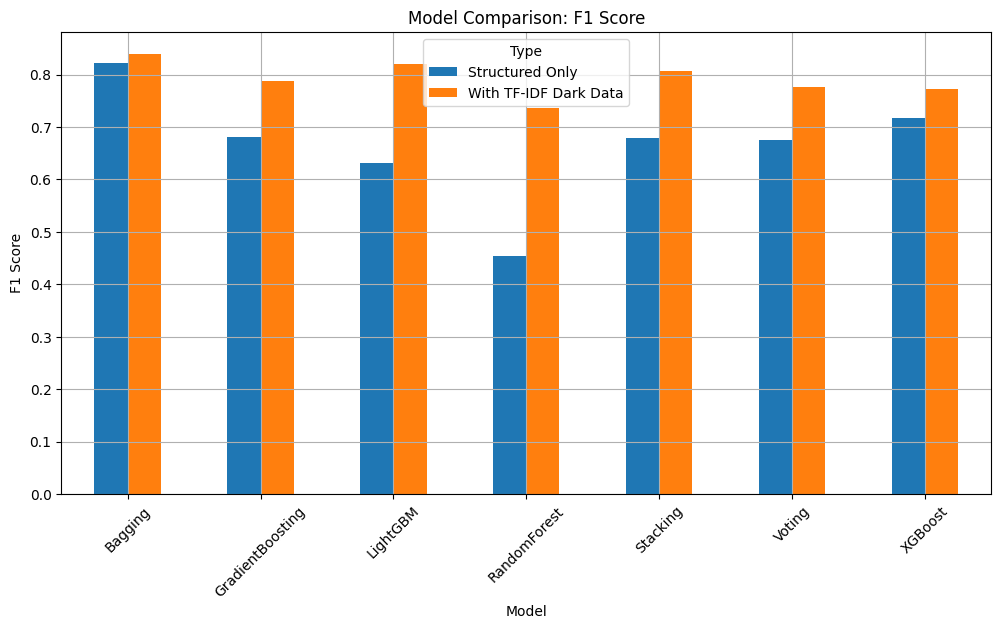

In [ ]:
plot_comparison(results_structured,results_tfidf)


In [115]:
import pandas as pd
import re

# Load your dataset
df = pd.read_csv("om_output.csv")  # or whichever file has your 'doctor_notes'

# Fill missing doctor notes with empty strings
df['doctor_notes'] = df['doctor_notes'].fillna("")

# Define basic keyword dictionaries
disease_keywords = [
    "leukemia", "lymphoma", "myeloma", "syndrome", "cancer",
    "myelodysplastic", "aml", "cll", "cml", "mds"
]

symptom_keywords = [
    "fatigue", "fever", "pain", "discomfort", "night sweats",
    "weight loss", "sweating", "infections", "nausea", "dizziness"
]

# Helper function to extract relations from a note
def extract_relations(note):
    note_lower = note.lower()
    diseases = [d for d in disease_keywords if d in note_lower]
    symptoms = [s for s in symptom_keywords if s in note_lower]

    relations = []
    for d in diseases:
        for s in symptoms:
            relations.append((d.title(), "has_symptom", s.title()))
    return relations

# Apply to all notes
relation_data = []

for idx, row in df.iterrows():
    pid = row['patient_id'] if 'patient_id' in df.columns else idx
    note = row['doctor_notes']
    extracted = extract_relations(note)
    for rel in extracted:
        relation_data.append({
            "patient_id": pid,
            "source": rel[0],
            "relation": rel[1],
            "target": rel[2]
        })

# Convert to DataFrame
relation_df = pd.DataFrame(relation_data)
relation_df.to_csv("extracted_relations.csv", index=False)

# Preview
print(relation_df.head())


  patient_id    source     relation      target
0     P00012  Leukemia  has_symptom     Fatigue
1     P00012  Leukemia  has_symptom  Discomfort
2     P00012       Cll  has_symptom     Fatigue
3     P00012       Cll  has_symptom  Discomfort
4     P00014  Leukemia  has_symptom     Fatigue



Confusion Matrix for RandomForest


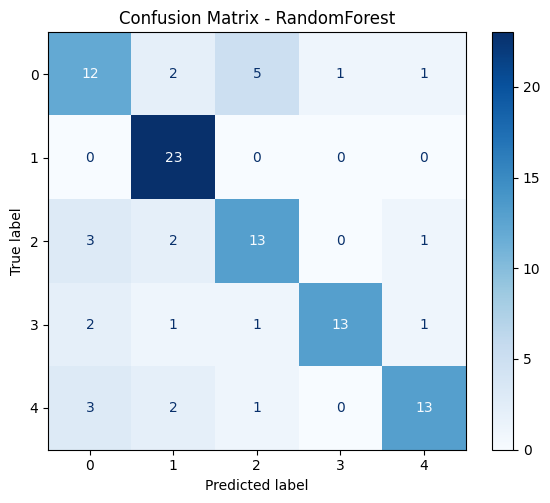


Confusion Matrix for GradientBoosting


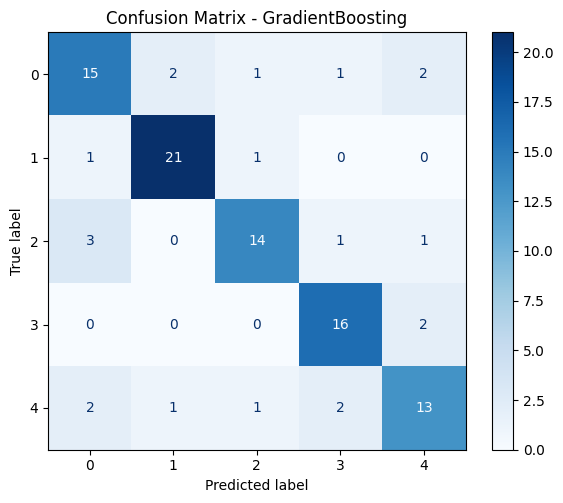


Confusion Matrix for XGBoost


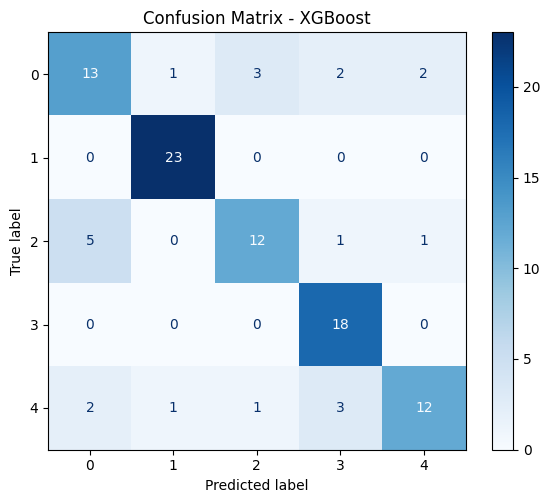


Confusion Matrix for LightGBM


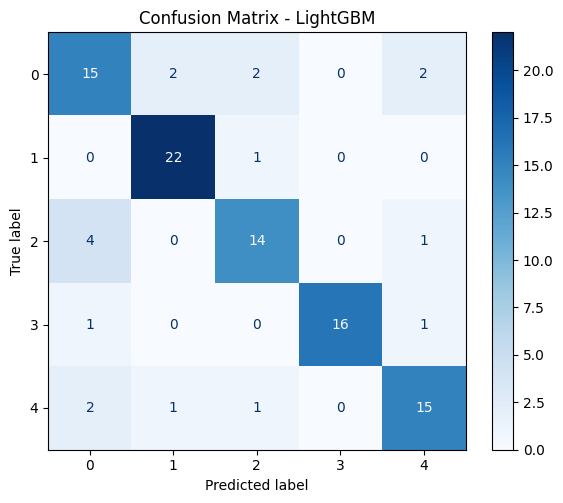


Confusion Matrix for Bagging


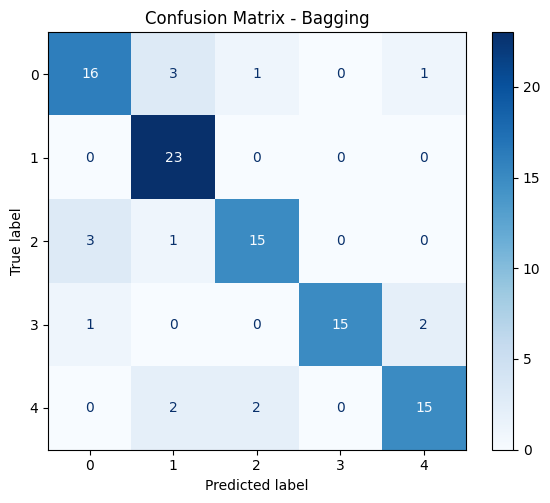


Confusion Matrix for Voting


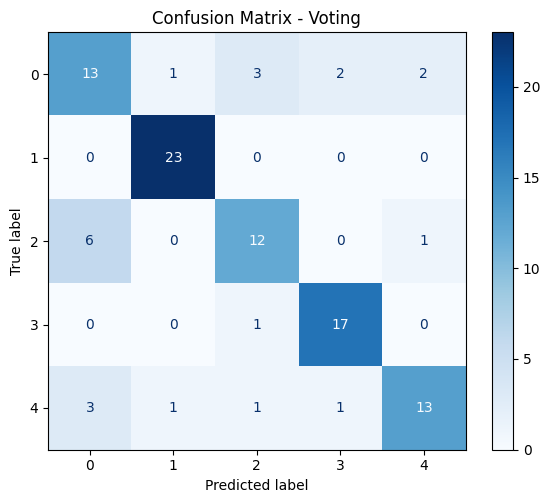


Confusion Matrix for Stacking


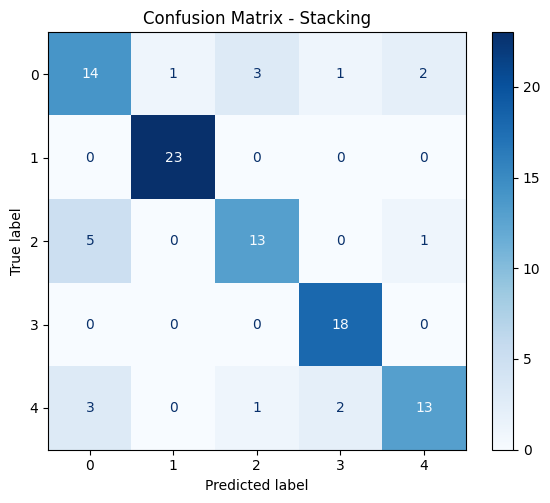

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrices
for name, model in models.items():
    print(f"\nConfusion Matrix for {name}")
    
    # Predict again to ensure latest predictions (in case models were overwritten)
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_ if hasattr(model, 'classes_') else sorted(set(y_test)))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_ if hasattr(model, 'classes_') else sorted(set(y_test)))
    
    fig, ax = plt.subplots(figsize=(6, 5))
    disp.plot(ax=ax, cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


In [118]:
import os
import json
import pandas as pd
import scispacy
import en_ner_bc5cdr_md
import re

# Load BioNER model
nlp = en_ner_bc5cdr_md.load()

# ---------- Extraction Function ----------
def extract_doctor_info(text):
    if pd.isnull(text) or not isinstance(text, str):
        return {
            'entities': [],
            'numericals': [],
            'important_terms': []
        }

    doc = nlp(text)

    entities = list(set(ent.text.strip().lower() for ent in doc.ents))
    numericals = re.findall(r'\b(?:WBC|RBC|Hemoglobin|Platelets|Hematocrit|MCV|Lymphocyte|Neutrophil)[ =:]?(\d+\.?\d*)', text, re.IGNORECASE)
    important_terms = re.findall(r'\b[A-Z][a-z]+(?: [A-Z][a-z]+)*\b', text)

    return {
        'entities': entities,
        'numericals': numericals,
        'important_terms': important_terms
    }

# ---------- Folder Creation ----------
output_folder = "extracted_bioner_data"
os.makedirs(output_folder, exist_ok=True)

# ---------- Loop Over Patients ----------
for idx, row in df.iterrows():
    patient_id = row['patient_id'] if 'patient_id' in df.columns else f"patient_{idx:03d}"
    note = row['doctor_notes']

    # Extract info
    result = extract_doctor_info(note)
    result['patient_id'] = patient_id

    # Save to individual JSON file
    file_name = f"patient_{str(patient_id)}.json"
    file_path = os.path.join(output_folder, file_name)

    with open(file_path, 'w', encoding='utf-8') as f:
        json.dump(result, f, indent=4)

print(f"✅ All patient files saved in: {output_folder}")


✅ All patient files saved in: extracted_bioner_data
